# From Files to texts to nltk.Text

In the beginning of the first chapter of _[Natural Language Processing with Python](https://www.nltk.org/book/ch01.html)_, the authors have you download and import a number of prepared texts, which the rest of the chapter then uses. We already have a text, so this notebook starts off by importing the `nltk` library and then making it into the particular kind of *Text* that many `nltk` operations expect. For now, simply run the code in the first cell and let it set up Richard Connell's "The Most Dangerous Game" as well as Joseph Conrad's _Heart of Darkness_ as two text objects you can then explore.

This notebook is designed to allow you to explore the first section of the first chapter, "Computing with Language: Texts and Words" in the NLTK book.

As always, the first thing we do is import and load.

Here we are importing the NLTK and then loading two texts, Richard Connell's "The Most Dangerous Game" and Joseph Conrad's _Heart of Darkness_. (Conrad's novel was published in 1899, but it features a very similar plot: the protagonist white man encounters another man who has seemingly lost his connection with civilization. (There is a lot to be said about the whiteness that runs through both texts, but that is for a different class.)

## A Note about Pythonic Code and Research Notebooks

As you work through these materials, try to practice two things: using markdown cells like this one to narrate what you are doing and then `# comments` in your code that describe what a line (or cluster of lines) do. For those still or somewhat new to Python, it's a language that "likes" white space and many pythonistas prefer things more vertical than horizontal.

That is, you could write a line of code like below, but it is more difficult to read than the vertically organized code you see elsewhere in this notebook.

```python
hod = nltk.Text(nltk.tokenize.word_tokenize(open('../data/hod.txt', 'r').read()))
```

For our purposes, codes that is easier to read is better than code that is more compact. We are using code to *explore* human language and not (yet) building any kind of infrastructure where efficiency and compactness are more important than legibility and reproducibility.

Another reason to write vertical code is that Python will often locate an error by line. If there is a lot happening on one line, it's harder to know what broke. If it's only one thing, then you know it's that thing which is broken.

## Recursion to Words, er, Tokens

In [1]:
# Imports
import nltk

# Open and read the file to create a string object
with open("../data/mdg.txt", mode="r") as f:
    mdg_string = f.read()

# Testing out sentence tokenizing:
mdg_sentences = nltk.tokenize.sent_tokenize(mdg_string)

# Let's see some results:
for sentence in mdg_sentences[0:10]:
    print(sentence)

"Off there to the right -- somewhere -- is a large island," said Whitney.
"It's rather a mystery -- "
"What island is it?"
Rainsford asked.
"The old charts call it 'Ship-Trap Island,'" Whitney replied.
"A suggestive name, isn't it?
Sailors have a curious dread of the place.
I don't know why.
Some superstition -- "
"Can't see it," remarked Rainsford, trying to peer through the dank tropical night that was palpable as it pressed its thick warm blackness in upon the yacht.
"You've good eyes," said Whitney, with a laugh, "and I've seen you pick off a moose moving in the brown fall bush at four hundred yards, but even you can't see four miles or so through a moonless Caribbean night."
"Nor four yards," admitted Rainsford.


In [2]:
# And now testing out word tokenizing:
mdg_words = nltk.tokenize.word_tokenize(mdg_string)

# With the usual check:
for word in mdg_words[0:5]:
    print(word)

``
Off
there
to
the


It is important to note that we are not getting just words, we are getting whatever our code tells Python is a sub-string we can shove into a list. That is why the double back ticks are showing up in our list. 

The NLTK's `word_tokenize()` function may or may not align with what you think should be included: that is why it is important to be able to tokenize as you think is appropriate.

With the basics of tokenization out of the way, let's take a look at how we might count words from within the NLTK. 

To do this, we are going to use some built-in functionality, frequency distribution, called via `FreqDist()`. Note how we still iterate through out string using a `for` loop. As we did when we created our own dictionary of terms, first we create an empty container and then we fill it. This first time around we do it by sentence.

**Note**: I have used a very clear naming convention for my variables (objects).

In [3]:
# Create the object
mdg_fd = nltk.FreqDist()

# Populate the object
for sentence in nltk.tokenize.sent_tokenize(mdg_string):
    for word in nltk.tokenize.word_tokenize(sentence):
        mdg_fd[word] += 1

# Let's see what that count is:
len(mdg_fd)

2064

That number is very close to the 1974 we got when we created our own dictionary of words. Let's take a look at what's in there:

In [4]:
mdg_fd.most_common(10)

[('.', 640),
 (',', 556),
 ('the', 439),
 ('a', 246),
 ('``', 223),
 ("''", 210),
 ('I', 178),
 ('he', 173),
 ('of', 171),
 ('and', 155)]

It looks like the difference of 90 tokens can somewhat be explained by punctuation and, and this is a guess, capitalization. (Remember, when we created our dictionary of tokens, we not only dropped all non-letter characters, save the apostrophe, but we also normalized to all lowercase.

In [5]:
mdg_fd_alt = nltk.FreqDist()
for word in nltk.tokenize.word_tokenize(mdg_string.lower()):
        mdg_fd_alt[word] += 1

# Let's see what the count is now:
len(mdg_fd_alt)

1934

*Oh! Now we have dropped below our earlier count!*

Repeat after me: tokenization depends on the analyst preferences. The only thing that really matters here is you have some explanation for why you are tokenizing in this fashion and that you use the same method across your entire set of texts, or *corpus*.

We can subtract the difference between the using sets. (See, you can math language.)

In [6]:
mdg_diff = set(mdg_fd) - set(mdg_fd_alt)

print(mdg_diff)

{'For', 'Precisely', 'Moscow', 'Another', 'Providence', 'Always', 'Somewhere', 'Cape', 'Zaroff', 'Really', 'Follow', 'Sorry', 'Crimea', 'Here', 'Poor', 'York', 'Twenty', 'Rio', 'Dense', 'Please', 'Why', 'Last', 'To', 'Au', 'What', 'Monte', 'That', 'East', 'Chinese', 'Invariably', 'God', 'Russia', 'Surely', 'At', 'Suppose', 'Whitney', 'Whenever', 'Not', 'Life', 'America', 'Straining', 'Yes', 'Lucar', 'mid-Victorian', 'All', 'Come', 'Cliquot', 'Of', 'Your', 'The', 'Tibet', 'Trap', 'Caribbean', 'Throwing', 'Lazarus', 'Even', 'Rainsford', 'Pistol', 'Death', 'Americans', 'Cossack', 'Guns', 'Automatically', 'Better', 'On', 'A', 'Swede', 'You', 'Then', 'Nor', "'Ship-Trap", 'Madame', 'Out', 'English', 'He', 'Toward', 'His', 'Maybe', 'Great', 'Dear', 'Under', 'Ca', 'Luckily', 'Paris', 'As', 'Sanger', 'Those', 'Did', 'White', 'So', 'Sleep', 'Carlo', 'Sea', 'May', 'Once', 'Sometimes', 'Down', 'Pure', 'After', 'When', 'From', 'Doubtless', 'God-forsaken', 'Nerve', 'Very', 'Amazon', 'Jagged', 'Folie

If you ask Python what kind of data structure freq_dist is, you'll get a rather unhelpful response, but look at the output of `mdg_fd.most_common(10)` again (above). What does it look like?

In [7]:
# Let's see what kind of data structure this is:
print(type(mdg_fd))

# What's it look like inside?
for i in mdg_fd[0:5]:
    print(i)

<class 'nltk.probability.FreqDist'>


TypeError: unhashable type: 'slice'

In [8]:
# Treating freqdist as a tuple
# And using f-strings to make it easy to print our results
for word, frequency in mdg_fd.most_common(10):
    print(f"{word} :  {frequency}")

.:  640
,:  556
the:  439
a:  246
``:  223
'':  210
I:  178
he:  173
of:  171
and:  155


In [18]:
# The built-in way to do this:
# for token in mdg_fd:
#    print(token, ',', mdg_fd[token], '\n')

# If you run the above you will get a LOOOONNNG list.
# So we are going to go for the shorter version:
for token in mdg_fd.most_common(5):
    print(f"{token}, {mdg_fd[token]}")

('.', 640), 0
(',', 556), 0
('the', 439), 0
('a', 246), 0
('``', 223), 0


The code above exposes functionality we can use, namely `mdg_fd[token]`. Let's try it out with a word we know is in our text.

In [10]:
mdg_fd["hunter"]

11

That suggests that we could develop a list of words (tokens!) in which we are interested and get back their counts.

In [11]:
# First, a list of words:
words = ["hunter", "hunted", "hunts", "hunting", "hunt"]

# Now to try out our functinality:
for word in words:
    print(word, ",", mdg_fd[word])

hunter , 11
hunted , 4
hunts , 0
hunting , 24
hunt , 18


This does seem rather repetitive, since we had to include 5 different forms of the same word. There is a way to reduce words to their *lemma*s, and we will explore that a little later in the course.

<Axes: xlabel='Samples', ylabel='Counts'>

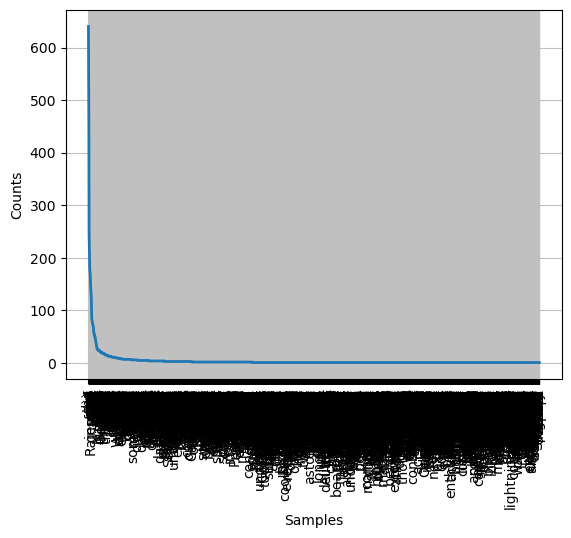

In [12]:
# freq_dist comes with a lot of functionality
# (See Table 3.1 in Chapter 1 of the NLTK book for more ideas.)
mdg_fd.plot()

## Creating and Working with an NLTK `Text`

You can do more than simply count words, though as we will see over the next few modules there is a lot you can do with frequencies. *A lot.* You can also look at where words occur in a text, both locally and globally. We will start with locals, using something called *Key Word in Context* (aka KWiC), which the NLTK makes available through the `concordance` function.

In [28]:
# First, we re-create our token list
# and we include lowercasing our text
# And now testing out word tokenizing:
mdg_tokens = nltk.tokenize.word_tokenize(mdg_string.lower())

# Now we create our Text object
mdg_text = nltk.Text(mdg_tokens)

In [29]:
mdg_text.concordance("eyes")

Displaying 21 of 21 matches:
 in upon the yacht . `` you 've good eyes , '' said whitney , with a laugh , `
k him for a light . those fishy blue eyes held a look i never saw there before
hat i could sleep without closing my eyes ; the night would be my eyelids -- `
e rail , mystified . he strained his eyes in the direction from which the repo
eep of his life . when he opened his eyes he knew from the position of the sun
plunging upward into the gloom . his eyes made out the shadowy outlines of a p
d out . the first thing rainsford 's eyes discerned was the largest man rainsf
 out of the snarl of beard two small eyes regarded rainsford . `` do n't be al
k city . '' the menacing look in the eyes did not change . the revolver pointi
 from which rainsford had come . his eyes , too , were black and very bright .
inting into the night . rainsford 's eyes saw only blackness , and then , as t
of anger was in the general 's black eyes , but it was there for but a second 
 ; as they turned towar

In [15]:
mdg_text.similar("eyes")

light hunting he mouth head strokes hand revolver forehead general
zaroff bedroom room plate war tongue library shoulders rowers
alertness


**Note**: The authors introduce `concordance`, `similar`, `common_context`, `dispersion_plot`, and `generate` in this section. When you get to the dispersion plot, please note that, as the authors warn, you have to have other Python libraries installed for it to work i.e., `matplotlib`). 

Try moving back and forth between concordance and dispersion to see how much you can narrow in on the meaning of "The Most Dangerous Game" through finding the contexts / placement of 4-6 "key words." (Oh how the notion of "key" is going to haunt us!)

In [17]:
mdg_text.concordance("knife")

Displaying 7 of 7 matches:
ply of food and an excellent hunting knife . I give him three hours ' start . I
 you with hunting clothes , food , a knife . I suggest you wear moccasins ; the
ath containing a long-bladed hunting knife ; his right hand rested on a cocked 
is sack of food , Rainsford took his knife from its sheath and began to work wi
ng and to it he fastened his hunting knife , with the blade pointing down the t
ped too . They must have reached the knife . He shinned excitedly up a tree and
on his feet . But Ivan was not . The knife , driven by the recoil of the spring


In [21]:
mdg_text.similar("knife")

right yacht look sea sound direction lights shore opaqueness jungle
trail fight tree rifle compares question courtyard nap situation cat


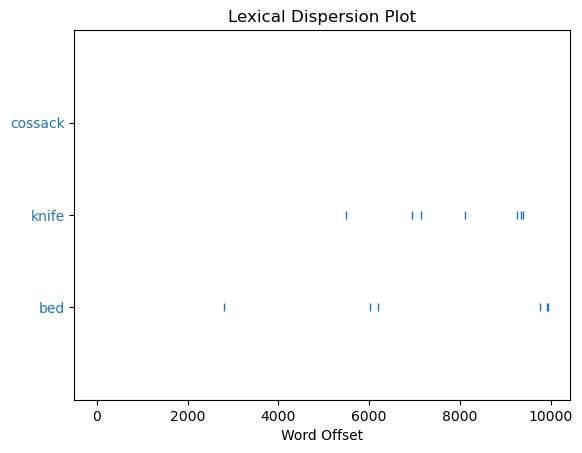

In [22]:
mdg_text.dispersion_plot(["cossack", "knife", "bed"])

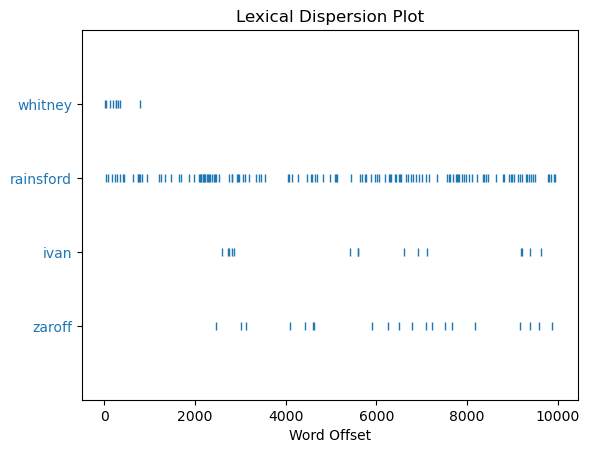

In [30]:
# We can also create our list in advance:
characters = ["whitney", "rainsford", "ivan", "zaroff"]

# And then feed the list to the function:
mdg_text.dispersion_plot(characters)

So, it would appear that the nltk.Text knows something about the contexts within which words occur. That is, it has some sense of what words go with other words: that is how it calcuate similarity and common contexts. Does that mean we can also use that "knowledge" generatively?

In [33]:
mdg_text.generate()

in a limousine . , mr. rainsford , lying near the island . and let it
fall , and , above all , it must have courage , cunning , and ivan ,
'' explained the general made one of the hounds stopped abruptly , and
, taking care to leave this island built this house , and it creaked
up stiffly , as if the air ; then he straightened up and took from his
enemy , the general 's face . `` i 'll agree to nothing of your visit
here . the general inquired solicitously . ?


"in a limousine . , mr. rainsford , lying near the island . and let it\nfall , and , above all , it must have courage , cunning , and ivan ,\n'' explained the general made one of the hounds stopped abruptly , and\n, taking care to leave this island built this house , and it creaked\nup stiffly , as if the air ; then he straightened up and took from his\nenemy , the general 's face . `` i 'll agree to nothing of your visit\nhere . the general inquired solicitously . ?"

## Comparing Texts

Hold for now.

In [ ]:
# Create a list of substrings, aka words
mdg_tokens = nltk.tokenize.word_tokenize(mdg_string.lower())

# Create the NLTK Text object
mdgText = nltk.Text(mdg_words)

# Repeat the 3 steps for "Heart of Darkness"
with open("../data/hod.txt", mode="r") as f:
    hod_string = f.read()
    
hod_words = nltk.tokenize.word_tokenize(hod_string.lower())

hodText = nltk.Text(hod_words)

# Check our output and compare lengths
print(len(mdg), len(hod))

We have a long-ish short story of almost ten thousand words, and short-ish novel of forty-six thousand words. How can we go about comparing them? 

One place to start is to get a sense of the total number of unique words. For that we are going to use Python `set()` function.

In [ ]:
# This is a long list:
print(len(set(mdg)), len(set(hod)))

If we do the math, _Heart of Darkness_, which is four and a half time longer than "The Most Dangerous Game," only uses three times the number of words. Interesting. Let's store that information away for further exploration. 

In [ ]:
def lex_div (text):
    lexdiv =len(set(text)) / len(text)
    return lexdiv


In [ ]:
lex_div(mdg)

In [ ]:
lex_div(hod)

In [ ]:
len(set(hod))/len(set(mdg))